In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('task3df.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)

X = df[[
    'fm.mean', 'Wind.mean', 'LATITUDE', 'LONGITUDE', 'DISCOVERY_DOY',
    'FIRE_YEAR', 'cont_time', 'PROJECTED_FINAL_IM_COST', 'ACRES',
    'TOTAL_PERSONNEL', 'STR_DAMAGED', 'WF_FSR', 'FATALITIES', 'FIRE_SIZE',
    'eco1_10  NORTH AMERICAN DESERTS', 'eco1_11  MEDITERRANEAN CALIFORNIA',
    'eco1_12  SOUTHERN SEMIARID HIGHLANDS', 'eco1_13  TEMPERATE SIERRAS',
    'eco1_15  TROPICAL WET FORESTS', 
#     'eco1_2  TUNDRA', 'eco1_3  TAIGA',
    'eco1_5  NORTHERN FORESTS', 'eco1_6  NORTHWESTERN FORESTED MOUNTAINS',
    'eco1_7  MARINE WEST COAST FOREST', 'eco1_8  EASTERN TEMPERATE FORESTS',
    'eco1_9  GREAT PLAINS', 'FUEL_MODEL_Brush (2 feet)',
    'FUEL_MODEL_Chaparral (6 feet)', 'FUEL_MODEL_Closed Timber Litter',
    'FUEL_MODEL_Dormant Brush, Hardwood Slash',
    'FUEL_MODEL_Hardwood Litter', 'FUEL_MODEL_Heavy Logging Slash',
    'FUEL_MODEL_Light Logging Slash', 'FUEL_MODEL_Medium Logging Slash',
    'FUEL_MODEL_Short Grass (1 foot)', 'FUEL_MODEL_Southern Rough',
    'FUEL_MODEL_Tall Grass (2.5 feet)',
    'FUEL_MODEL_Timber (Grass and Understory)',
    'FUEL_MODEL_Timber (Litter and Understory)', 'GROWTH_POTENTIAL_Extreme',
    'GROWTH_POTENTIAL_High', 'GROWTH_POTENTIAL_Low',
    'GROWTH_POTENTIAL_Medium', 'TERRAIN_Extreme', 'TERRAIN_High',
    'TERRAIN_Low', 'TERRAIN_Medium', 'FIRE_SIZE_CLASS_A',
    'FIRE_SIZE_CLASS_B', 'FIRE_SIZE_CLASS_C', 'FIRE_SIZE_CLASS_D',
    'FIRE_SIZE_CLASS_E', 'FIRE_SIZE_CLASS_F', 'FIRE_SIZE_CLASS_G'
    ]].copy()

y_cols = ['STAT_CAUSE_DESCR_Arson', 'STAT_CAUSE_DESCR_Campfire',
       'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
       'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
       'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous',
       'STAT_CAUSE_DESCR_Powerline', 'STAT_CAUSE_DESCR_Railroad',
       'STAT_CAUSE_DESCR_Smoking', 'STAT_CAUSE_DESCR_Structure']
    
# y = pd.DataFrame()
temp = np.empty((X.shape[0],1))
y = pd.DataFrame(temp, columns=['cause'])

for i, col in enumerate(y_cols):
    y[df[col] == 1] = col.split('_')[-1]

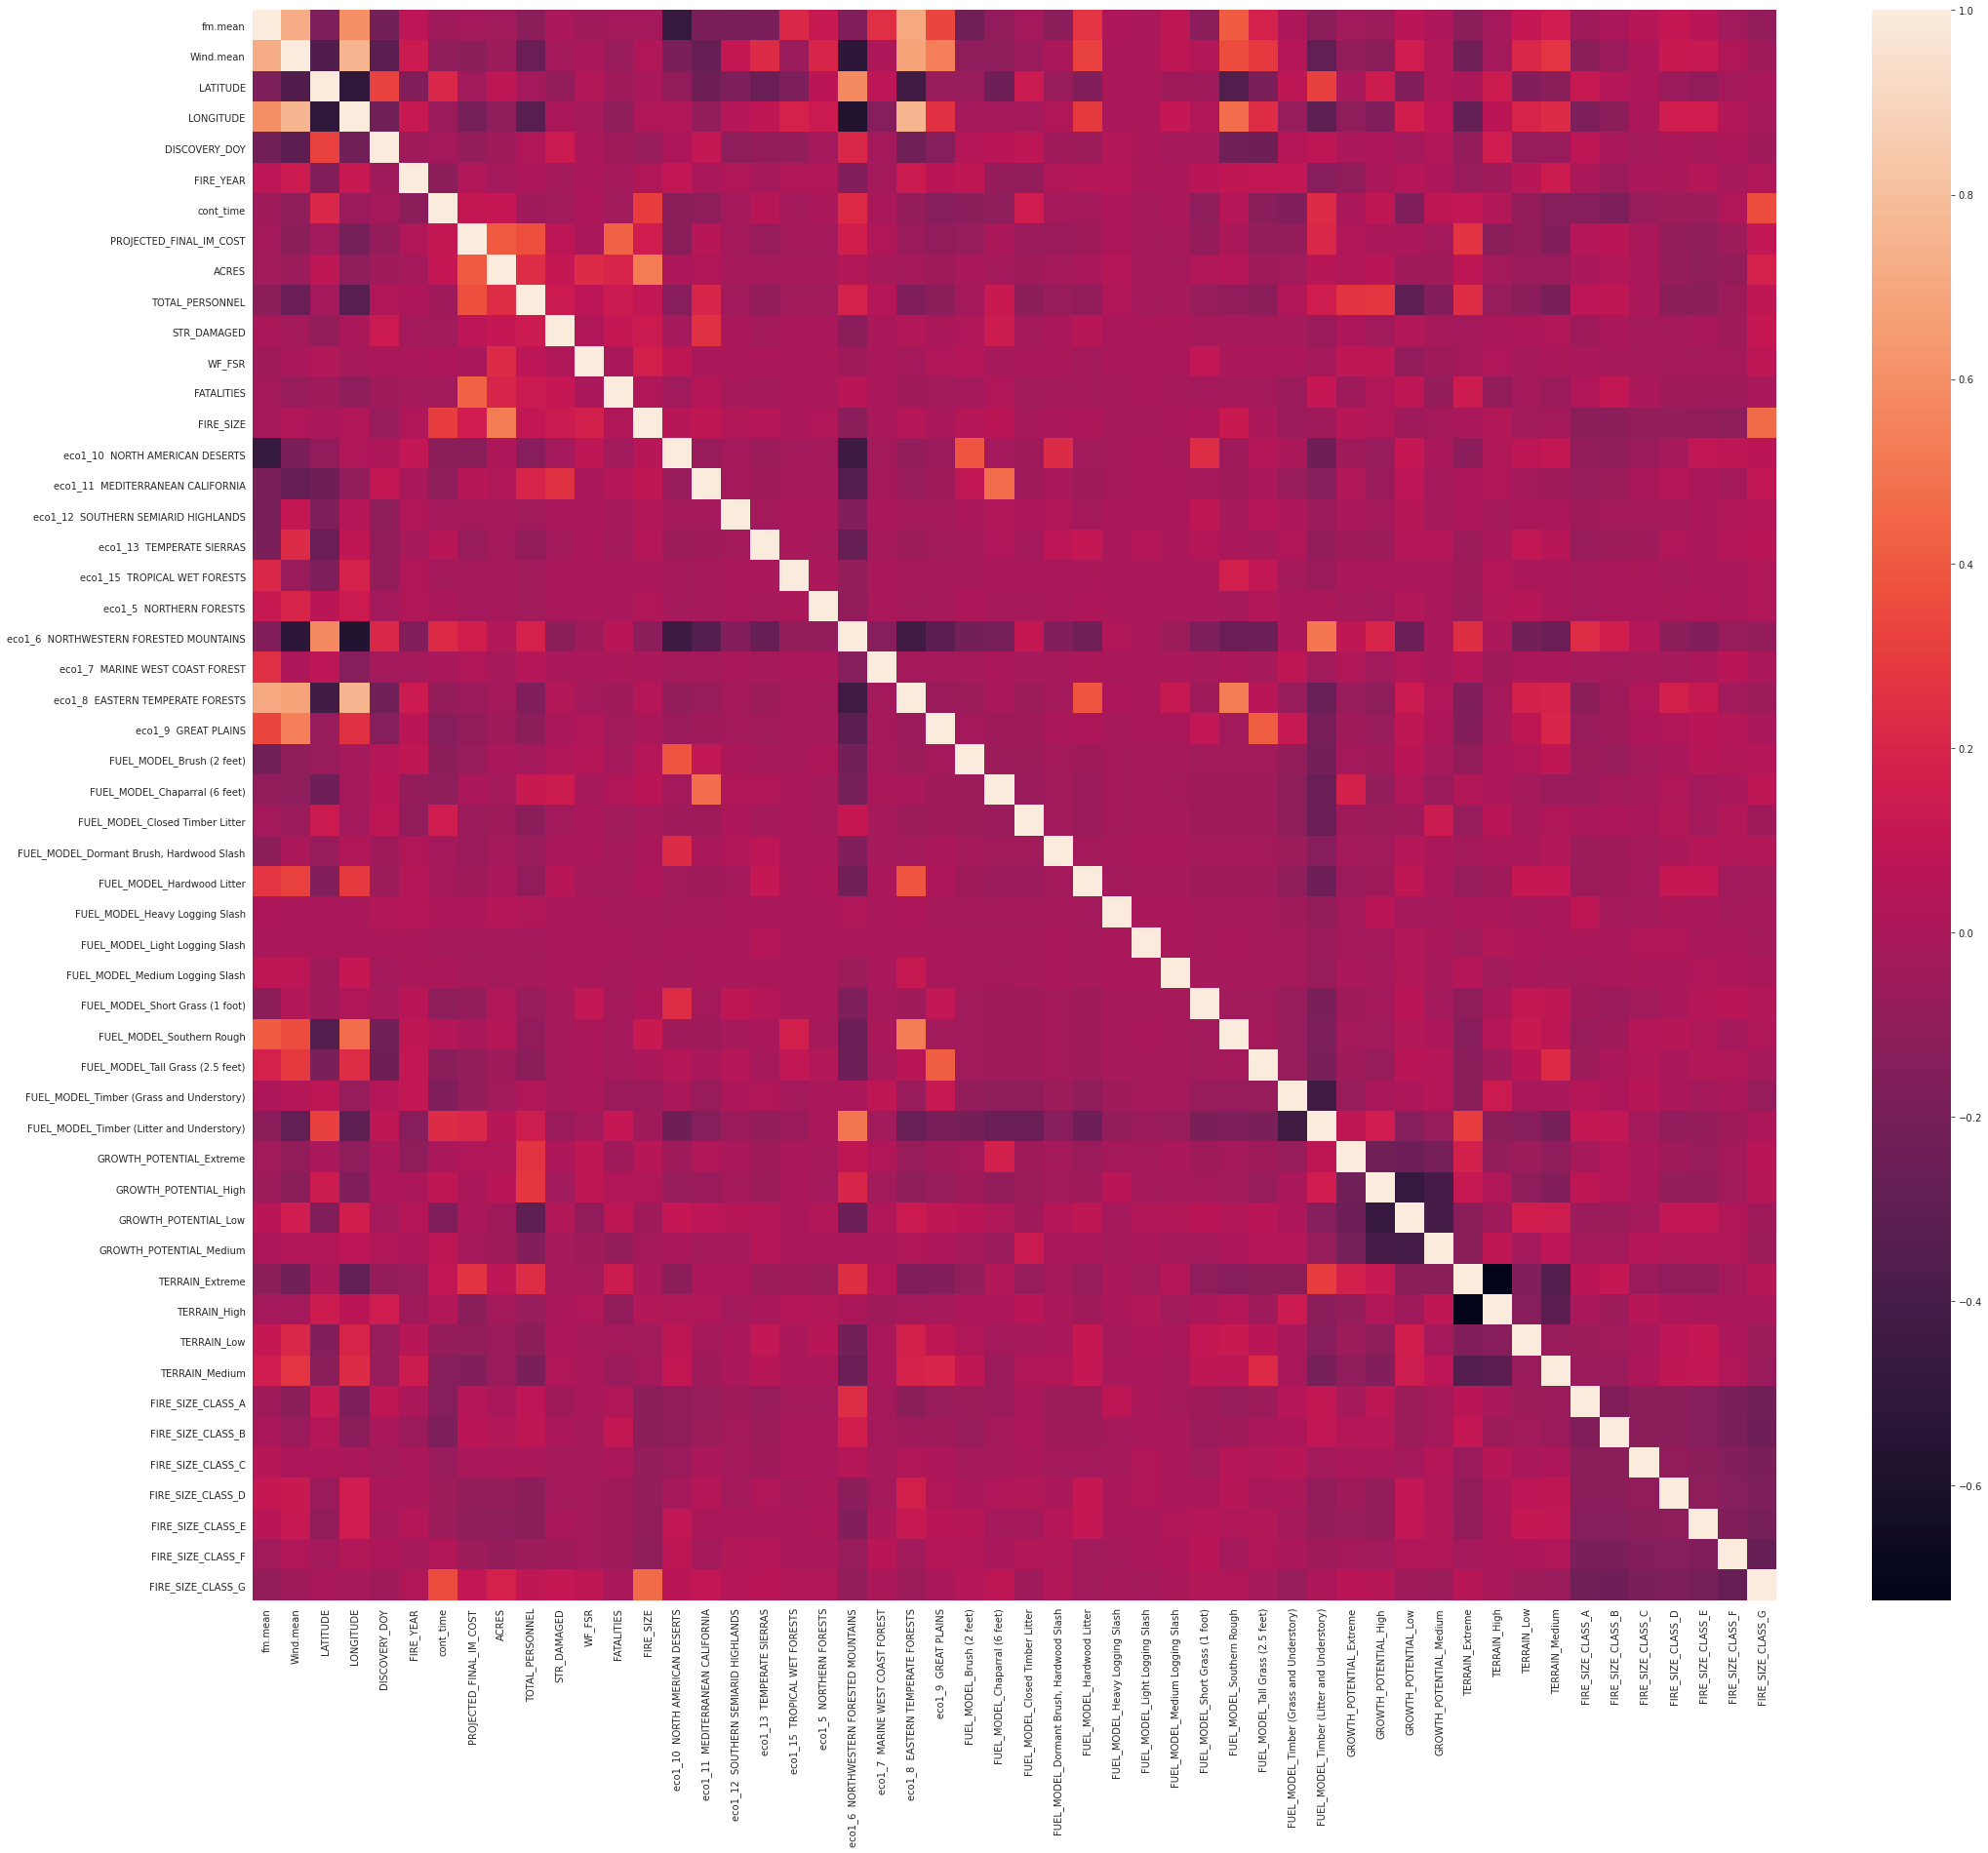

In [3]:
sns.set_palette("Purples_d")
sns.set_style('whitegrid')

plt.subplots(figsize=(35,30))
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

def per_class_acc(y_true, y_pred, class_names):
    class_names = y_true['cause'].unique()
    
    cm = multilabel_confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    print(cm.shape)
    
    print("Accuracy:")
    for i in range(cm.shape[0]):
        print("    {}: {}".format(class_names[i], np.around(cm[i],3)))
        
print("==================")
print("=== No Scaling ===")
print("==================")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print("\n=== Random Forest ===")
rf = RandomForestClassifier().fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
print(f"Total acc: {rf.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y_cols)

print("\n=== Decision Tree Classifier ===")
dtc = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())
y_pred = dtc.predict(X_test)
print(f"Total acc: {dtc.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y_cols)

print("\n=== K Nearest Neighbours ===")
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print(f"Total acc: {knn.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

print("\n=== LDA ===")
lda = LinearDiscriminantAnalysis().fit(X_train, y_train.values.ravel())
y_pred = lda.predict(X_test)
print(f"Total acc: {lda.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

print("\n=== QDA ===")
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train.values.ravel())
y_pred = qda.predict(X_test)
print(f"Total acc: {qda.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

# print("\n=== MLP ===")
# mlp = MLPClassifier().fit(X_train, y_train.values.ravel())
# y_pred = mlp.predict(X_test)
# print(f"Total acc: {mlp.score(X_test, y_test)}")
# per_class_acc(y_test, y_pred, y.columns)

# print("\n=== Linear SVC ===")
# lsvc = LinearSVC().fit(X_train, y_train.values.ravel())
# y_pred = lsvc.predict(X_test)
# print(f"Total acc: {rf.score(X_test, y_test)}")
# per_class_acc(y_test, y_pred, y.columns)

# print("\n=== Logistic Regression (multinomial) ===")
# lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
# y_pred = lr.predict(X_test)
# per_class_acc(y_test, y_pred, y.columns)
# print(f"Total acc: {lr.score(X_test, y_test)}")

# print("\n=== Logistic Regression (ovr) ===")
# lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
# y_pred = lr.predict(X_test)
# per_class_acc(y_test, y_pred, y.columns)
# print(f"Total acc: {lr.score(X_test, y_test)}")

=== No Scaling ===

=== Random Forest ===
Total acc: 0.9908029713477184
(12, 2, 2)
Accuracy:
    Lightning: [[0.999 0.068]
 [0.001 0.932]]
    Miscellaneous: [[0.999 0.003]
 [0.001 0.997]]
    Campfire: [[1. 0.]
 [0. 1.]]
    Arson: [[0.999 0.038]
 [0.001 0.962]]
    Debris Burning: [[0.998 0.005]
 [0.002 0.995]]
    Equipment Use: [[1. 0.]
 [0. 1.]]
    Powerline: [[0.997 0.006]
 [0.003 0.994]]
    Smoking: [[0.997 0.008]
 [0.003 0.992]]
    Railroad: [[0.999 0.   ]
 [0.001 1.   ]]
    Children: [[1. 0.]
 [0. 1.]]
    Fireworks: [[1. 0.]
 [0. 1.]]
    Structure: [[1. 0.]
 [0. 1.]]

=== Decision Tree Classifier ===
Total acc: 0.9862044570215777
(12, 2, 2)
Accuracy:
    Lightning: [[0.997 0.063]
 [0.003 0.937]]
    Miscellaneous: [[0.999 0.018]
 [0.001 0.982]]
    Campfire: [[1.    0.083]
 [0.    0.917]]
    Arson: [[0.999 0.066]
 [0.001 0.934]]
    Debris Burning: [[0.999 0.08 ]
 [0.001 0.92 ]]
    Equipment Use: [[1. 0.]
 [0. 1.]]
    Powerline: [[0.982 0.003]
 [0.018 0.997]]
    Smok

/home/sreisig/anaconda3/envs/math561/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


Total acc: 0.7868175922650631
(12, 2, 2)
Accuracy:
    Lightning: [[0.973 0.678]
 [0.027 0.322]]
    Miscellaneous: [[0.983 0.805]
 [0.017 0.195]]
    Campfire: [[0.999 1.   ]
 [0.001 0.   ]]
    Arson: [[0.987 0.765]
 [0.013 0.235]]
    Debris Burning: [[0.979 0.778]
 [0.021 0.222]]
    Equipment Use: [[0.999 0.895]
 [0.001 0.105]]
    Powerline: [[0.669 0.106]
 [0.331 0.894]]
    Smoking: [[0.926 0.644]
 [0.074 0.356]]
    Railroad: [[0.995 0.844]
 [0.005 0.156]]
    Children: [[0.998 0.977]
 [0.002 0.023]]
    Fireworks: [[0.999 0.937]
 [0.001 0.063]]
    Structure: [[1.    0.975]
 [0.    0.025]]

=== QDA ===


/home/sreisig/anaconda3/envs/math561/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Total acc: 0.23629288998938805
(12, 2, 2)
Accuracy:
    Lightning: [[0.963 0.836]
 [0.037 0.164]]
    Miscellaneous: [[0.984 0.763]
 [0.016 0.237]]
    Campfire: [[1.    0.935]
 [0.    0.065]]
    Arson: [[0.982 0.977]
 [0.018 0.023]]
    Debris Burning: [[0.976 0.922]
 [0.024 0.078]]
    Equipment Use: [[1. 0.]
 [0. 1.]]
    Powerline: [[0.246 0.025]
 [0.754 0.975]]
    Smoking: [[0.921 0.763]
 [0.079 0.237]]
    Railroad: [[0.996 0.99 ]
 [0.004 0.01 ]]
    Children: [[0.999 0.809]
 [0.001 0.191]]
    Fireworks: [[1.   0.99]
 [0.   0.01]]
    Structure: [[ 1. nan]
 [ 0. nan]]


/home/sreisig/anaconda3/envs/math561/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [5]:
print("====================")
print("=== With Scaling ===")
print("====================")
# Scale continuous variables
scaler = StandardScaler()
X.loc[:,X.columns[0:14]] = scaler.fit_transform(X[(X.columns[0:14])])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print("\n=== Random Forest ===")
rf = RandomForestClassifier().fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
print(f"Total acc: {rf.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y_cols)

print("\n=== Decision Tree Classifier ===")
dtc = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())
y_pred = dtc.predict(X_test)
print(f"Total acc: {dtc.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y_cols)

print("\n=== K Nearest Neighbours ===")
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print(f"Total acc: {knn.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

print("\n=== LDA ===")
lda = LinearDiscriminantAnalysis().fit(X_train, y_train.values.ravel())
y_pred = lda.predict(X_test)
print(f"Total acc: {lda.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

print("\n=== QDA ===")
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train.values.ravel())
y_pred = qda.predict(X_test)
print(f"Total acc: {qda.score(X_test, y_test)}")
per_class_acc(y_test, y_pred, y.columns)

# print("\n=== MLP ===")
# mlp = MLPClassifier().fit(X_train, y_train.values.ravel())
# y_pred = mlp.predict(X_test)
# print(f"Total acc: {rf.score(X_test, y_test)}")
# per_class_acc(y_test, y_pred, y.columns)

# print("\n=== Linear SVC ===")
# lsvc = LinearSVC().fit(X_train, y_train.values.ravel())
# y_pred = lsvc.predict(X_test)
# print(f"Total acc: {rf.score(X_test, y_test)}")
# per_class_acc(y_test, y_pred, y.columns)

# print("\n=== Logistic Regression (multinomial) ===")
# lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
# y_pred = lr.predict(X_test)
# per_class_acc(y_test, y_pred, y.columns)
# print(f"Total acc: {lr.score(X_test, y_test)}")

# print("\n=== Logistic Regression (ovr) ===")
# lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
# y_pred = lr.predict(X_test)
# per_class_acc(y_test, y_pred, y.columns)
# print(f"Total acc: {lr.score(X_test, y_test)}")

=== With Scaling ===

=== Random Forest ===
Total acc: 0.9898596863577408
(12, 2, 2)
Accuracy:
    Lightning: [[0.999 0.075]
 [0.001 0.925]]
    Miscellaneous: [[0.999 0.003]
 [0.001 0.997]]
    Campfire: [[1. 0.]
 [0. 1.]]
    Arson: [[0.999 0.029]
 [0.001 0.971]]
    Debris Burning: [[0.998 0.009]
 [0.002 0.991]]
    Equipment Use: [[1. 0.]
 [0. 1.]]
    Powerline: [[0.997 0.007]
 [0.003 0.993]]
    Smoking: [[0.996 0.008]
 [0.004 0.992]]
    Railroad: [[1. 0.]
 [0. 1.]]
    Children: [[1. 0.]
 [0. 1.]]
    Fireworks: [[1. 0.]
 [0. 1.]]
    Structure: [[1. 0.]
 [0. 1.]]

=== Decision Tree Classifier ===
Total acc: 0.98673505482844
(12, 2, 2)
Accuracy:
    Lightning: [[0.998 0.047]
 [0.002 0.953]]
    Miscellaneous: [[0.999 0.026]
 [0.001 0.974]]
    Campfire: [[1.    0.042]
 [0.    0.958]]
    Arson: [[0.999 0.063]
 [0.001 0.937]]
    Debris Burning: [[0.998 0.085]
 [0.002 0.915]]
    Equipment Use: [[1.   0.05]
 [0.   0.95]]
    Powerline: [[0.981 0.003]
 [0.019 0.997]]
    Smoking:

/home/sreisig/anaconda3/envs/math561/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Total acc: 0.12905317769131
(12, 2, 2)
Accuracy:
    Lightning: [[0.963 0.5  ]
 [0.037 0.5  ]]
    Miscellaneous: [[0.983 0.959]
 [0.017 0.041]]
    Campfire: [[1.    0.944]
 [0.    0.056]]
    Arson: [[0.983 0.881]
 [0.017 0.119]]
    Debris Burning: [[0.976 0.764]
 [0.024 0.236]]
    Equipment Use: [[1. 0.]
 [0. 1.]]
    Powerline: [[0.22  0.008]
 [0.78  0.992]]
    Smoking: [[0.922 0.667]
 [0.078 0.333]]
    Railroad: [[0.995 0.992]
 [0.005 0.008]]
    Children: [[0.999 0.836]
 [0.001 0.164]]
    Fireworks: [[1.    0.991]
 [0.    0.009]]
    Structure: [[ 1. nan]
 [ 0. nan]]


/home/sreisig/anaconda3/envs/math561/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [6]:
impt = rf.feature_importances_
rf_feat_impt = {}
for i, v in enumerate(impt):
    rf_feat_impt[X.columns[i]] = v
    
rf_feat_impt = dict(sorted(rf_feat_impt.items(), key=lambda item: item[1], reverse=True))
rf_feat_impt

{'DISCOVERY_DOY': 0.1326221027470936,
 'LATITUDE': 0.12780113069164784,
 'LONGITUDE': 0.10711970907151024,
 'FIRE_SIZE': 0.08317633733616527,
 'cont_time': 0.07419327421001463,
 'ACRES': 0.05810552620858831,
 'FIRE_YEAR': 0.052485657091518,
 'PROJECTED_FINAL_IM_COST': 0.045822428158058884,
 'TOTAL_PERSONNEL': 0.03503564562951561,
 'Wind.mean': 0.02576777544428888,
 'eco1_6  NORTHWESTERN FORESTED MOUNTAINS': 0.02056219991853765,
 'STR_DAMAGED': 0.019191800906656203,
 'fm.mean': 0.018472248364384172,
 'WF_FSR': 0.012251288470168233,
 'eco1_11  MEDITERRANEAN CALIFORNIA': 0.012192784174449987,
 'FUEL_MODEL_Timber (Litter and Understory)': 0.011495870361876333,
 'TERRAIN_High': 0.010552811470044736,
 'TERRAIN_Extreme': 0.0101519101143752,
 'TERRAIN_Medium': 0.009291262564000483,
 'FIRE_SIZE_CLASS_F': 0.008529670988183335,
 'FIRE_SIZE_CLASS_G': 0.008275460366509182,
 'FUEL_MODEL_Chaparral (6 feet)': 0.007846782850145825,
 'GROWTH_POTENTIAL_Low': 0.0077090701730213014,
 'FIRE_SIZE_CLASS_E': 0

In [7]:
impt = dtc.feature_importances_
dtc_feat_impt = {}
for i, v in enumerate(impt):
    dtc_feat_impt[X.columns[i]] = v
    
dtc_feat_impt = dict(sorted(dtc_feat_impt.items(), key=lambda item: item[1], reverse=True))
dtc_feat_impt

{'LATITUDE': 0.23927562835447364,
 'DISCOVERY_DOY': 0.17680065736809059,
 'LONGITUDE': 0.1134249559287411,
 'FIRE_SIZE': 0.1110796906942335,
 'cont_time': 0.08488898147516166,
 'FIRE_YEAR': 0.054933077078398874,
 'ACRES': 0.036881075853641795,
 'Wind.mean': 0.024629419093025722,
 'PROJECTED_FINAL_IM_COST': 0.017508022231285253,
 'STR_DAMAGED': 0.016479431035098302,
 'FIRE_SIZE_CLASS_F': 0.009351048206873009,
 'TOTAL_PERSONNEL': 0.00912016607622267,
 'fm.mean': 0.00718491726637333,
 'FUEL_MODEL_Southern Rough': 0.00552498521168714,
 'TERRAIN_Medium': 0.005419008109872638,
 'FIRE_SIZE_CLASS_E': 0.005125333631378867,
 'FUEL_MODEL_Brush (2 feet)': 0.004970470759940681,
 'TERRAIN_High': 0.004823062644806787,
 'FUEL_MODEL_Closed Timber Litter': 0.004814978670181918,
 'FUEL_MODEL_Timber (Litter and Understory)': 0.0040944582098751,
 'eco1_11  MEDITERRANEAN CALIFORNIA': 0.0039140850389202545,
 'FUEL_MODEL_Chaparral (6 feet)': 0.0038980106755185616,
 'FUEL_MODEL_Hardwood Litter': 0.003650397051

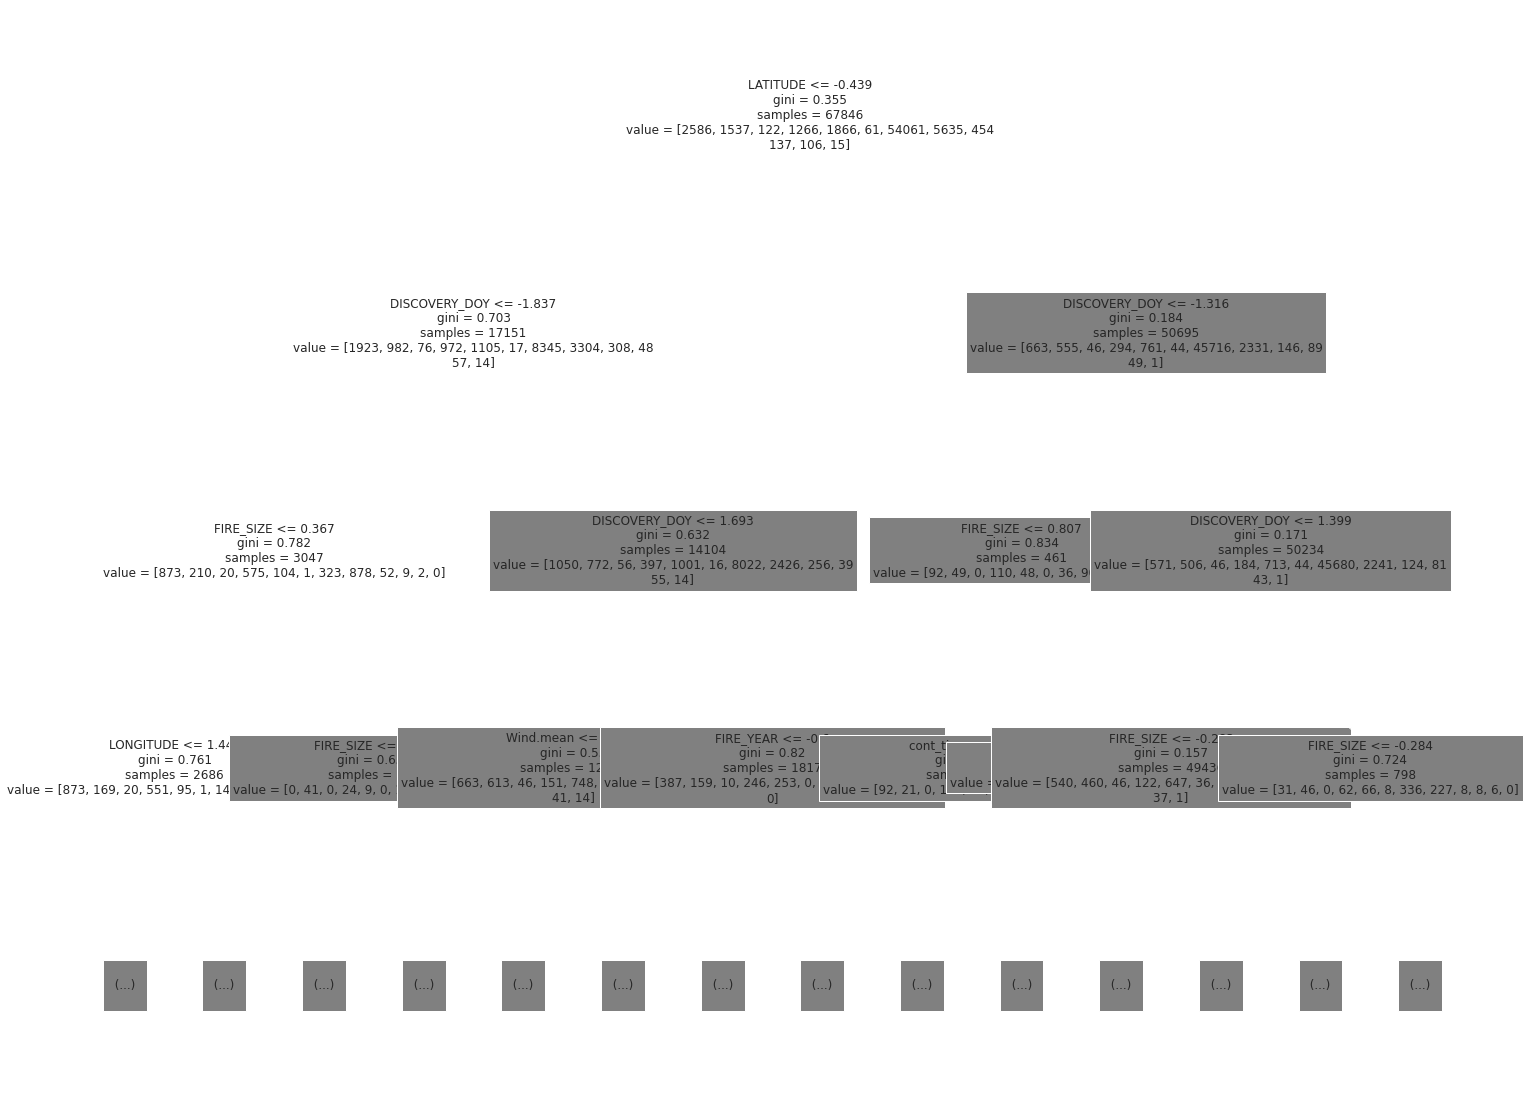

In [8]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, max_depth=3, feature_names=X.columns, fontsize=12)